In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
data = pd.read_csv(r"C:\Users\HP\Downloads\Titanic-Dataset.csv")
df = pd.DataFrame(data)

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#checking missing value
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.duplicated().sum()

0

### Handling missing values

C:\Users\HP\AppData\Local\Temp\ipykernel_10296\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

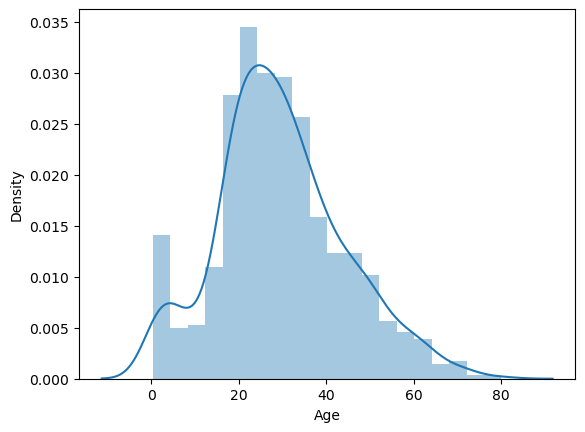

In [6]:
sns.distplot(df['Age'])

In [7]:
# Handling missing value using mean

In [8]:
df['Age_mean'] = df['Age'].fillna(df['Age'].mean())

In [9]:
df[['Age','Age_mean']]

,Age,Age_mean
0,22.0,22.000000
1,38.0,38.000000
2,26.0,26.000000
3,35.0,35.000000
4,35.0,35.000000
...,...,...
886,27.0,27.000000
887,19.0,19.000000
888,NaN,29.699118
889,26.0,26.000000


In [10]:
df['Age'] = df['Age_mean']

In [11]:
df['Age'].isnull().sum()

0

In [12]:
df['Age'].dtype

dtype('float64')

In [13]:
df['Age']= df['Age'].astype(int)

In [14]:
df['Age'].dtype

dtype('int32')

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,35.0


In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_mean         0
dtype: int64

In [17]:
# Here we can drop Cabin Column because there are so many null values present 687 out of 890 rows. approx 77% null value.

In [18]:
df.drop('Cabin', axis = 1, inplace = True)

In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Age_mean       0
dtype: int64

In [20]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [21]:
# We can replace Embarked's null value with its unique value with the help of mode technique, because it is very usefull for categorical feature.

In [22]:
df[df['Embarked'].notna()] # this data is showing without na values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,35.000000
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S,27.000000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S,19.000000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,S,29.699118
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C,26.000000


In [23]:
mode = df[df['Embarked'].notna()]['Embarked'].mode()[0]

In [24]:
mode

'S'

In [25]:
# Now we can replace this mode value with Embarked nan values

In [26]:
df['Embarked'] = df['Embarked'].fillna(mode)

In [27]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Age_mean       0
dtype: int64

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,35.0


In [29]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int32
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Age_mean       float64
dtype: object

In [30]:
df.drop('Age_mean', axis = 1, inplace = True)

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


In [32]:
import matplotlib.pyplot as plt

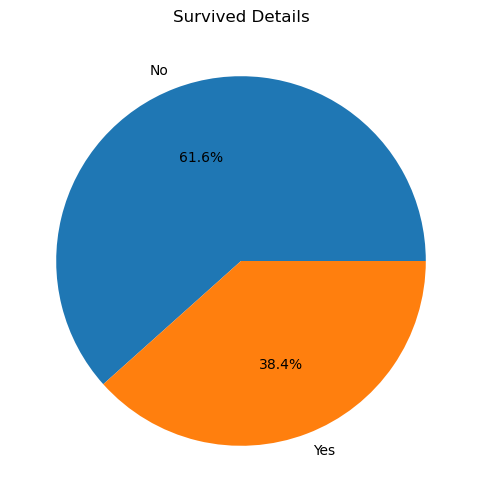

In [33]:
plt.figure(figsize=(8, 6))
plt.pie(df['Survived'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('Survived Details')
plt.show()

In [34]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [35]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Embarked'] = encoder.fit_transform(df['Embarked'])    # It assign numerical value as per alphabatic order means C=0, Q=1 and S=2

In [36]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [37]:
df['Sex'] = encoder.fit_transform(df['Sex'])   # It will assign female = 0 and male = 1

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,2


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int32  
dtypes: float64(1), int32(3), int64(5), object(2)
memory usage: 66.3+ KB


In [40]:
# For machine learning we can drop categorical column like Name, Ticket
df.drop(['Name', 'Ticket'], axis = 1, inplace = True)

In [41]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22,1,0,7.2500,2
1,2,1,1,0,38,1,0,71.2833,0
2,3,1,3,0,26,0,0,7.9250,2
3,4,1,1,0,35,1,0,53.1000,2
4,5,0,3,1,35,0,0,8.0500,2


In [42]:
# Assign Independent feature to x and dependent feature to y
x = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y = df['Survived']

In [43]:
x,y

(     Pclass  Sex  Age  SibSp  Parch     Fare  Embarked
 0         3    1   22      1      0   7.2500         2
 1         1    0   38      1      0  71.2833         0
 2         3    0   26      0      0   7.9250         2
 3         1    0   35      1      0  53.1000         2
 4         3    1   35      0      0   8.0500         2
 ..      ...  ...  ...    ...    ...      ...       ...
 886       2    1   27      0      0  13.0000         2
 887       1    0   19      0      0  30.0000         2
 888       3    0   29      1      2  23.4500         2
 889       1    1   26      0      0  30.0000         0
 890       3    1   32      0      0   7.7500         1
 
 [891 rows x 7 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
model = DecisionTreeClassifier()

In [46]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

[Text(0.3206023053814002, 0.9772727272727273, 'x[1] <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(0.15256008359456635, 0.9318181818181818, 'x[0] <= 2.5\ngini = 0.386\nsamples = 245\nvalue = [64, 181]'),
 Text(0.0438871473354232, 0.8863636363636364, 'x[2] <= 2.5\ngini = 0.074\nsamples = 130\nvalue = [5, 125]'),
 Text(0.01671891327063741, 0.8409090909090909, 'x[5] <= 88.775\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.008359456635318705, 0.7954545454545454, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.025078369905956112, 0.7954545454545454, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07105538140020899, 0.8409090909090909, 'x[2] <= 27.5\ngini = 0.061\nsamples = 128\nvalue = [4, 124]'),
 Text(0.04179728317659352, 0.7954545454545454, 'x[2] <= 24.5\ngini = 0.12\nsamples = 47\nvalue = [3.0, 44.0]'),
 Text(0.025078369905956112, 0.75, 'x[5] <= 13.396\ngini = 0.048\nsamples = 41\nvalue = [1, 40]'),
 Text(0.01671891327063741, 0.7045454545454546, 'x[2] <= 2

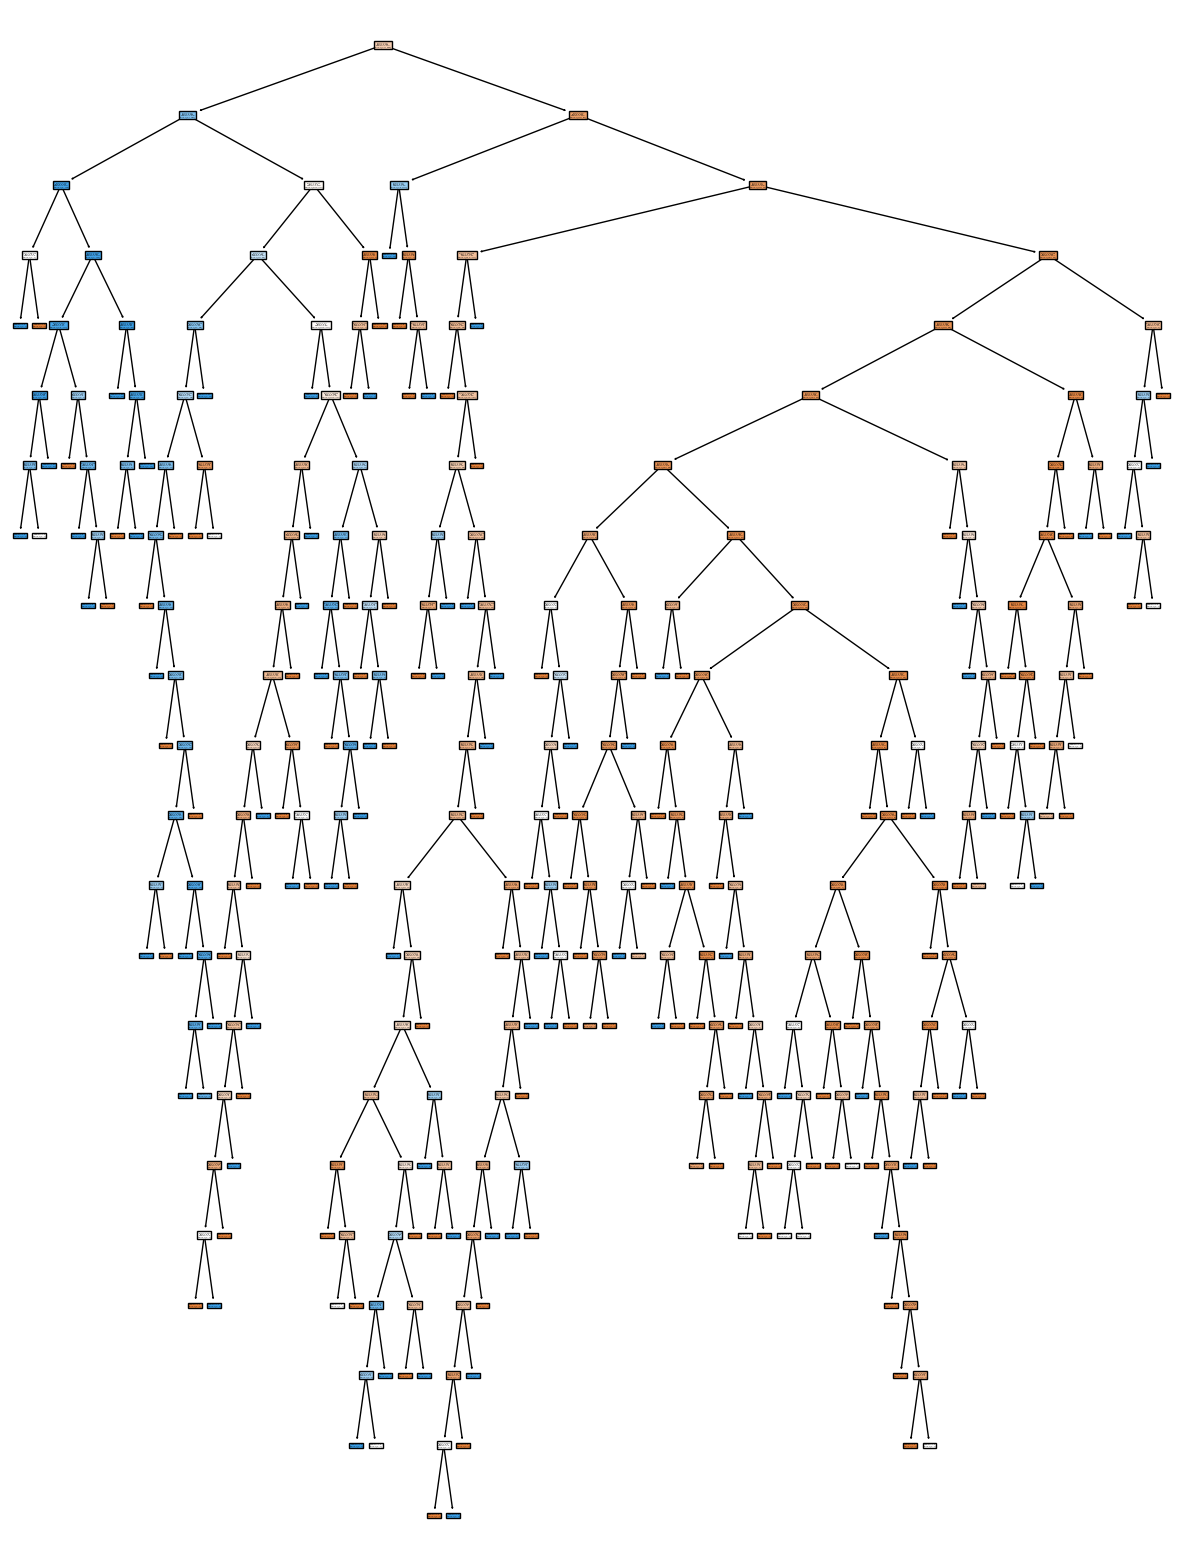

In [47]:
plt.figure(figsize = (15,20))
plot_tree(model, filled = True)

In [48]:
## post pruning with max depth = 2
model = DecisionTreeClassifier(max_depth = 5)

In [49]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [50]:
# prediction
y_pred = model.predict(x_test)

In [51]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [52]:
accuracy = accuracy_score(y_test, y_pred)

In [53]:
conf = confusion_matrix(y_test,y_pred)

In [54]:
report = classification_report(y_test,y_pred)

In [55]:
accuracy

0.7988826815642458

In [56]:
feature_imp = model.feature_importances_

Text(0.5, 1.0, 'Feature_Imp of DesicionTreeClassification')

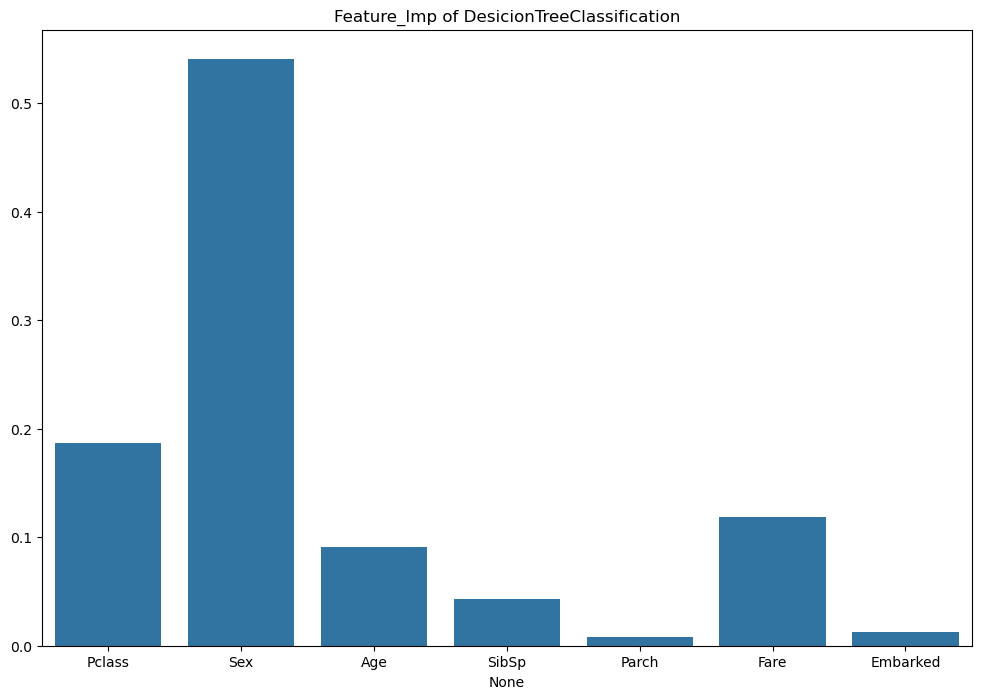

In [57]:
plt.figure(figsize = (12,8))
sns.barplot(y = feature_imp, x = x.columns)
plt.title('Feature_Imp of DesicionTreeClassification')

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
model2 = LogisticRegression()

In [60]:
model2.fit(x_train,y_train)

LogisticRegression()

In [61]:
y_predict = model.predict(x_test)

In [62]:
accuracy = accuracy_score(y_test,y_predict)

In [63]:
conf = confusion_matrix(y_test,y_predict)

In [64]:
report = classification_report(y_test,y_predict)

In [65]:
accuracy

0.7988826815642458

In [66]:
conf

array([[95, 10],
       [26, 48]], dtype=int64)

In [67]:
print(report)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.65      0.73        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.78       179
weighted avg       0.80      0.80      0.79       179

